In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
from scipy.stats import ttest_rel, ttest_ind
import numpy as np
import seaborn as sns

rc('text', usetex=False);
font = {'family' : 'helvetica',
        'weight' : 'normal',
        'size'   : 19}

rc('font', **font);

degrees = u'\u00B0'
um = u'\u00B5m'

In [15]:
def p_to_stars(p):
    """map p-values to stars to display on graphs"""
    if p > 0.05:
        return 'n.s.';
    elif p > 0.01:
        return '*';
    elif p > 0.005:
        return '**';
    else:
        return '***';

In [16]:
def my_boxplot(df, ylabel, column_names=['Control', 'Experimental'], scatter=True, ttest=False):
    fig, ax = plt.subplots(1,1,figsize=[4,8])
    sns.boxplot(data=df, whis=np.inf)
    if scatter:
        sns.swarmplot(data=df, color=".2")
    ax.set_ylabel(ylabel);
    ax.grid(False)
 
    # FOR NOW, ONLY T-TEST BETWEEN TWO CONDITIONS
    if ttest and len(column_names) > 1:
        p = ttest_ind(df[column_names[0]].dropna(), df[column_names[1]].dropna()).pvalue;
        print(p)
        start_ylims = ax.get_ylim();
        start_plot_height = ax.get_ylim()[1] - ax.get_ylim()[0];
        height_per_comparison = 0.1 * (start_ylims[1] - start_ylims[0]);
        ax.set_ylim(start_ylims[0], start_ylims[1] +  height_per_comparison);
        lx = ax.get_xticks()[0];
        rx = ax.get_xticks()[1];
        mid = lx/2 + rx/2;
        lry = start_ylims[1] + 0.5 * height_per_comparison;
        h = height_per_comparison/4;
 
        barx = [lx, lx, rx, rx];
        bary = [(lry-h), lry, lry, (lry-h)];
        ax.plot(barx, bary, c='black');
        ax.text(mid, lry + h/2, p_to_stars(p)); 
 
    return ax;


0.024335613903093276


/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['helvetica'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


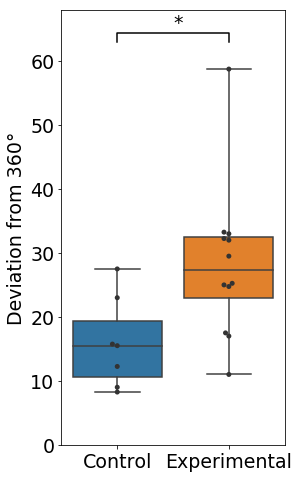

In [17]:
df = pd.read_csv("/Users/cib/Desktop/deviation from 360.csv")
ax = my_boxplot(df, "Deviation from 360" u'\u00B0', column_names=['Control', 'Experimental'], scatter=True, ttest=True)
ax.set_ylim([0, 68]);

0.03180707653051328


(-2, 13)

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['helvetica'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


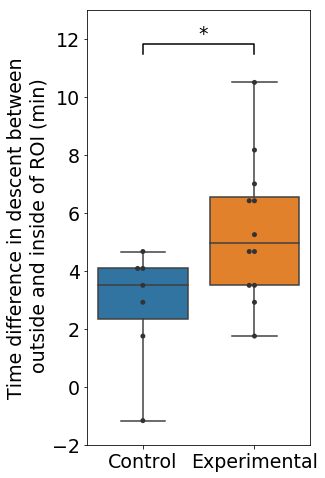

In [18]:
df4 = pd.read_csv("/Users/cib/Desktop/time difference in descent.csv")
ax = my_boxplot(df4, "Time difference in descent between\n outside and inside of ROI (min)", column_names=['Control', 'Experimental'], scatter=True, ttest=True)
ax.set_ylim([-2, 13]) 

0.0004325796585266516


/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1842: RuntimeWarning: invalid value encountered in double_scalars
  loval = q1 - whis * stats['iqr']
/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1843: RuntimeWarning: invalid value encountered in double_scalars
  hival = q3 + whis * stats['iqr']
/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1856: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1863: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)


(-2, 18)

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['helvetica'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


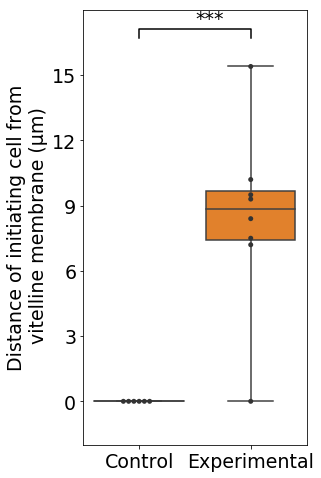

In [23]:
df2 = pd.read_csv("/Users/cib/Desktop/DATA/distance initiating cell.csv")
ax = my_boxplot(df2, "Distance of initiating cell from\n vitelline membrane (" u'\u00B5m)', column_names=['Control', 'Experimental'], scatter=True, ttest=True)
ax.set_yticks([y for y in range(-3,18,3)]);
ax.set_ylim([-2, 18])


(-14, 0)

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['helvetica'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


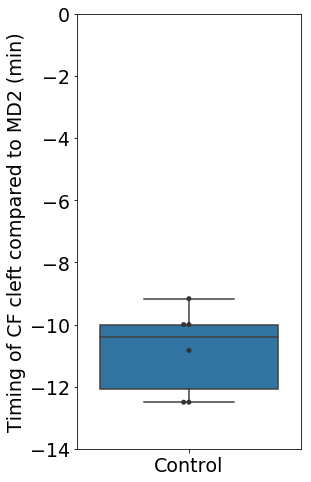

In [20]:
df3 = pd.read_csv("/Users/cib/Desktop/DATA/timing CF.csv")
ax = my_boxplot(df3,"Timing of CF cleft compared to MD2 (min)", column_names=['Control'], scatter=True, ttest=False)
ax.set_ylim([-14, 0]) 

In [21]:
print([a for a in range(-1, 18, 3)])

[-1, 2, 5, 8, 11, 14, 17]
